# Objective
To perform Exploratory Data Analysis (EDA) on hotel booking data in order to understand customer behavior, booking patterns, and key factors influencing cancellations, revenue, and occupancy trends across different hotel types.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [4]:
df=pd.read_csv(r"C:\Users\udayk\Downloads\Hotel Booking Analysis\hotelbooking_data.csv")

# Data Understanding

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
df.shape

(119390, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Cleaning

In [9]:
can_df=df[df['is_canceled']==1] # Filtering out a saperate dataframe that Contains only the Cancelled data

In [10]:
can_df.duplicated().sum()

0

In [11]:
can_df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              67
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4030
company                           43033


In [12]:
can_df['children'].fillna(value=0,inplace=True)

In [13]:
df.drop(columns=['name', 'email','phone-number', 'credit_card'],inplace=True)

In [14]:
can_df.duplicated().sum()

0

In [15]:
can_df["children"]=can_df["children"].astype(int)

In [16]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Visualizations For Analysis

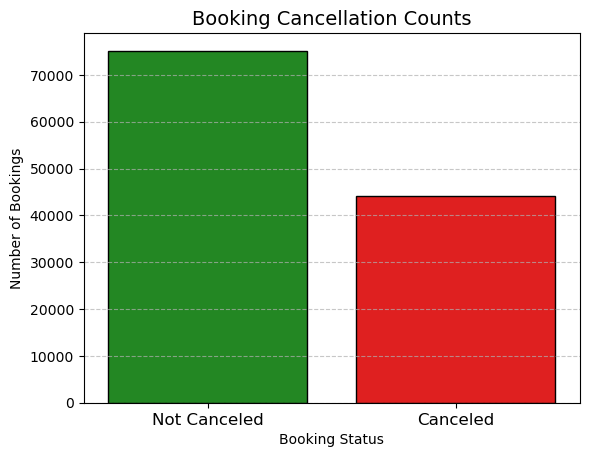

,is_canceled,count
0,0,75166
1,1,44224


In [38]:

BVC = df.groupby("is_canceled").size().reset_index(name='count')

sns.barplot(x="is_canceled", y="count", data=BVC, edgecolor="k",palette=["#129812","#FF0000"])
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"], fontsize=12)
plt.title("Booking Cancellation Counts", fontsize=14)
plt.ylabel("Number of Bookings")
plt.xlabel("Booking Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

BVC

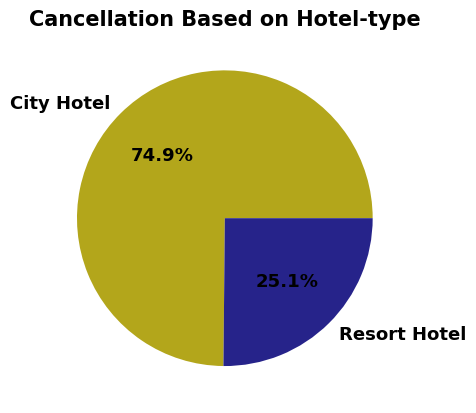

In [ ]:
x=can_df.groupby(["hotel"]).size()

plt.pie(x,labels=["City Hotel","Resort Hotel"],colors=["#11AD26","#26238A"],autopct="%.1f%%",textprops={"size":13,"weight":"bold"})
plt.title("Cancellation Based on Hotel-type",size=15,weight="bold")
plt.show()

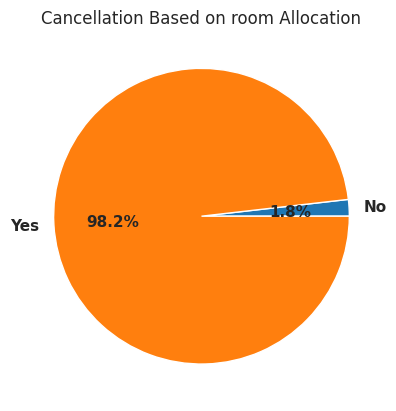

In [22]:
can_df['all_type']=(can_df['reserved_room_type']==can_df['assigned_room_type'])

mm=can_df.groupby("all_type")["hotel"].count()
sns.set_style("dark")
plt.pie(mm,autopct="%.1f%%",labels=["No","Yes"],textprops={"size":11,"weight":"bold"})
plt.title("Cancellation Based on room Allocation")
plt.show()

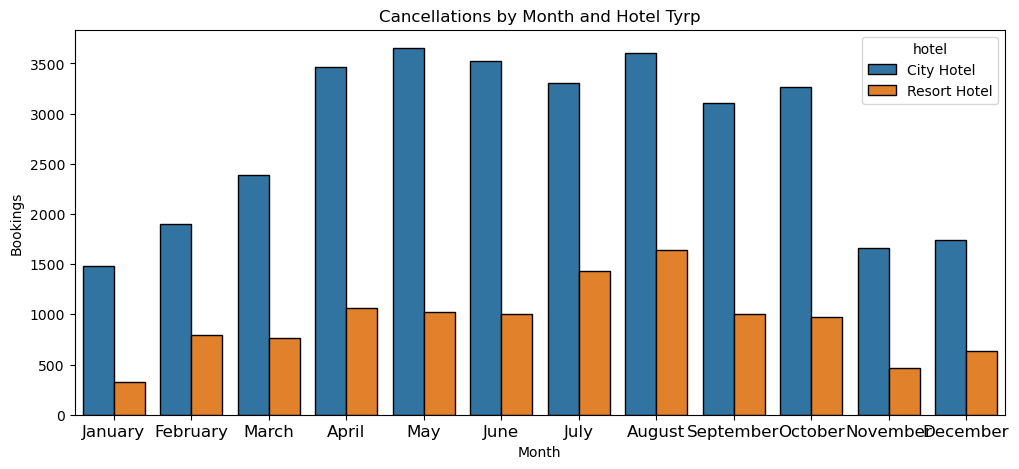

In [44]:
grouped_df = can_df.groupby(['hotel', 'is_canceled', 'arrival_date_month']).size().reset_index(name='count')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

grouped_df['arrival_date_month'] = pd.Categorical(grouped_df['arrival_date_month'], categories=month_order, ordered=True)

plt.figure(figsize=(12,5))
sns.barplot(x="arrival_date_month",y="count",data=grouped_df,hue="hotel",edgecolor="k")
plt.title("Cancellations by Month and Hotel Tyrp")
plt.xlabel("Month")
plt.ylabel("Bookings")
plt.xticks(fontsize=12)
plt.show()

In [24]:
# grouped_df

In [25]:
def fam(row):
  x = row['adults']
  y = row['children']
  z = row['babies'] # Assuming 'babies' was intended, not 'children' again
  if x >= 1 and y >= 1 or z >= 1:
    return "Family"
  elif x == 2 and y == 0 and z == 0:
    return "Couples or friends"
  elif x  or y ==1:
    return "Single"
  elif x>=3 or y>=2:
    return "friends"
  else:
    return "Other" # Handle other cases for better classification


can_df["C_type"] = can_df.apply(fam, axis=1) # Apply to each row

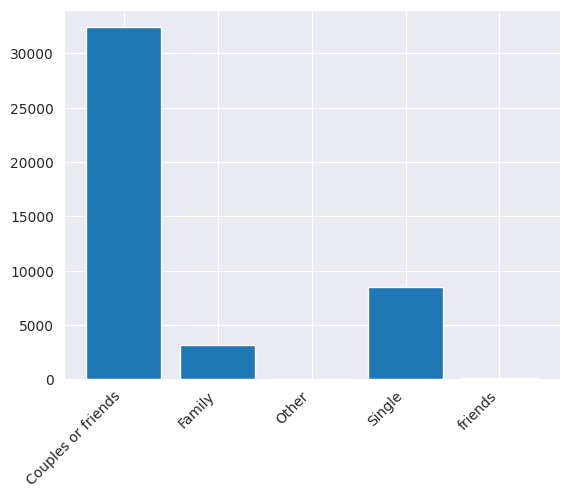

In [26]:
cat=can_df.groupby(["C_type"]).size()
plt.bar(cat.index,cat.values)
plt.xticks(rotation=45,ha="right")
plt.grid()
plt.show()

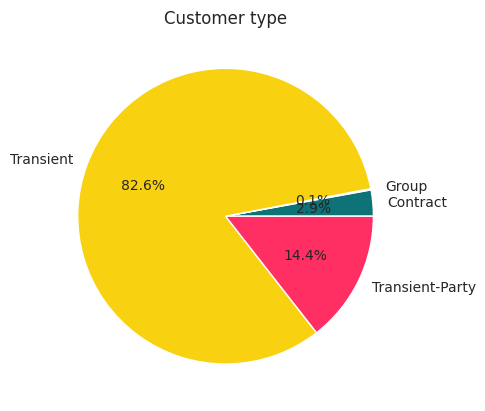

In [28]:
cc=can_df.groupby('customer_type').size()
co=['#0D7377', '#14FFEC', '#F8D210', '#FF2E63']
plt.pie(cc,labels=["Contract","Group","Transient","Transient-Party"],autopct="%.1f%%",colors=co)
plt.title("Customer type")
plt.show()
# cc

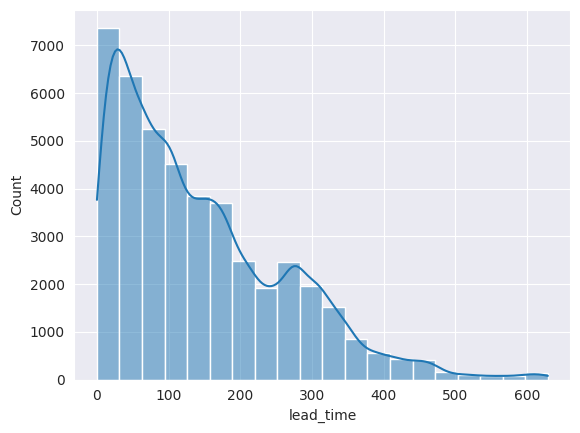

In [ ]:
before_booking=df.groupby('lead_time').size()

sns.histplot(x="lead_time",data=can_df,bins=20,kde=True)
plt.grid()
plt.show()

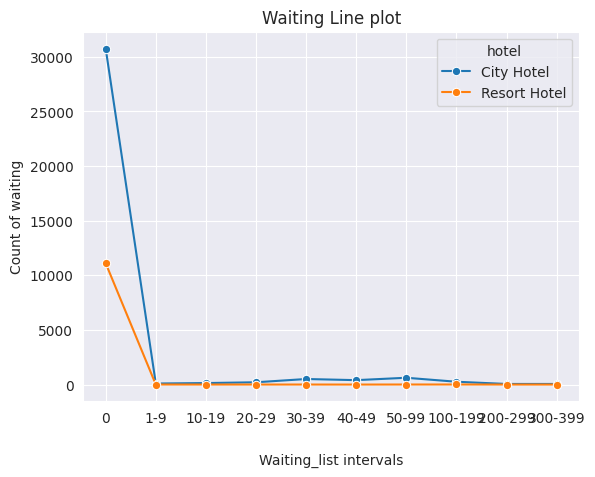

In [ ]:
bins = [0, 1, 10, 20, 30, 40, 50, 100, 200, 300, 400]
labels=["0","1-9","10-19","20-29","30-39",'40-49','50-99',"100-199",'200-299',"300-399"]
can_df['waiting_list'] = pd.cut(can_df['days_in_waiting_list'], bins=bins, right=False,labels=labels)

lp_df = can_df.groupby(['waiting_list', 'hotel']).size().reset_index(name='count')


sns.lineplot(x='waiting_list', y='count', hue='hotel', data=lp_df, marker="o")
plt.grid()
plt.xlabel("Waiting_list intervals", labelpad=20)
plt.ylabel("Count of waiting")
plt.title("Waiting Line plot")
plt.show()

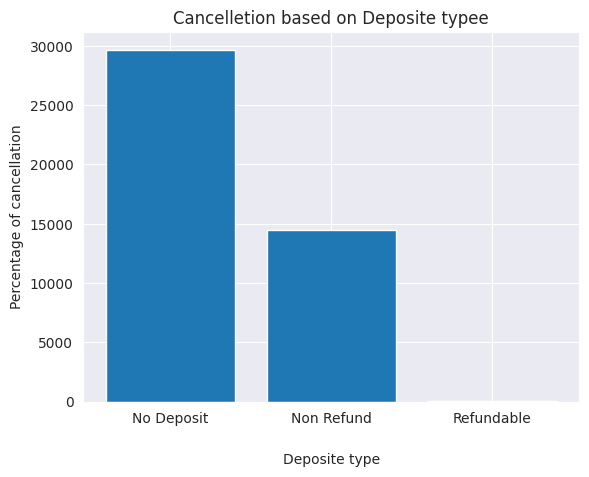

In [ ]:
deposit_cancellation = df.groupby('deposit_type')['is_canceled'].mean() * 100

plt.bar(deposit_cancellation.index,deposit_cancellation.values)
plt.ylabel("Percentage of cancellation")
plt.title("Cancelletion based on Deposite typee")
plt.xlabel("Deposite type",labelpad=20)
plt.grid()
plt.show()

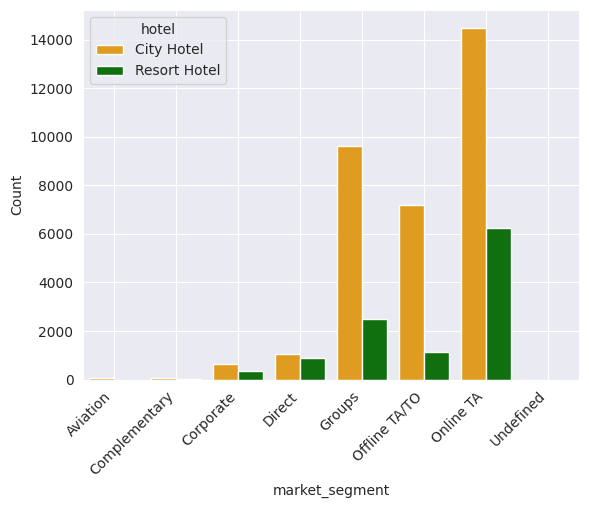

In [ ]:
xx1 = can_df.groupby(['market_segment', 'hotel']).size().reset_index(name='count')
sns.barplot(x='market_segment', y='count', hue='hotel', data=xx1, palette=["orange","green"])
plt.grid()
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

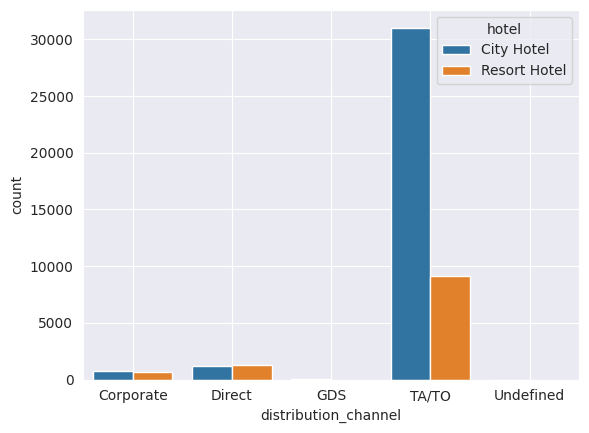

In [ ]:
mm = can_df.groupby(["distribution_channel", "hotel"]).size().reset_index(name="count")

sns.barplot(x="distribution_channel",y="count",data=mm,hue="hotel")
plt.grid()
plt.show()

In [ ]:
previous_cancellations_effect = df.groupby('previous_cancellations')['is_canceled'].mean() * 100
previous_cancellations_effect

,is_canceled
previous_cancellations,
0,33.906081
1,94.430673
2,32.758621
3,30.769231
4,22.580645
5,10.526316
6,31.818182
11,28.571429
13,91.666667


In [ ]:
previous_not_cancellations_effect = df.groupby('previous_bookings_not_canceled')['is_canceled'].mean() * 100
previous_not_cancellations_effect

,is_canceled
previous_bookings_not_canceled,
0,38.027123
1,5.123217
2,5.517241
3,5.105105
4,5.240175
...,...
68,0.000000
69,0.000000
70,0.000000


<Axes: xlabel='hotel', ylabel='count'>

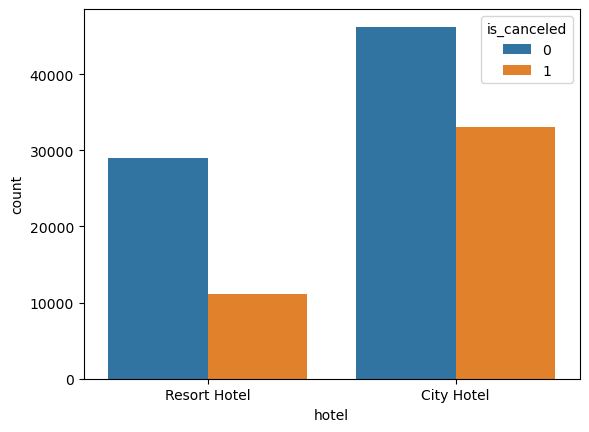

In [32]:
import seaborn as sns
sns.countplot(x='hotel', hue='is_canceled', data=df)


## 📌 Conclusion

The exploratory data analysis (EDA) of the hotel booking dataset revealed several valuable insights about customer behavior, booking patterns, and key factors affecting cancellations and revenue. The following are the key takeaways:

1. **High Cancellation Rate**
   - A significant portion of bookings are canceled, with **City Hotels experiencing more cancellations** than Resort Hotels.
   - **Long lead times** and **no-deposit bookings** are strongly associated with higher cancellation rates.

2. **Hotel Type Preferences**
   - **City Hotels** attract more bookings overall, but **Resort Hotels** generally have longer stays and fewer cancellations.
   - City Hotels also generate higher **average daily rates (ADR)**, especially in peak months.

3. **Seasonality and Demand Trends**
   - Booking volumes peak during **months (July and August)**.
   - Both hotel types exhibit strong seasonal trends, which can guide pricing and promotional strategies.

4. **Customer Segmentation**
   - The majority of guests are **transient** travelers and **non-repeat guests**.
   - Most bookings are for **two adults**, and a large number come from **Portugal**, followed by other European countries.

5. **Room Assignment Impact**
   - Guests receiving the **same room type as reserved** are less likely to cancel.
   - Ensuring consistent room allocation could help reduce cancellations.

6. **Booking Channels**
   - Most bookings are made through **online travel agencies (OTAs)** and **distribution channels** like corporate or direct bookings.
   - Understanding which channels lead to more cancellations can inform marketing and policy decisions.

7. **Revenue Insights**
   - Resort Hotels generally attract guests with **longer stays**, which could contribute more to revenue in low-cancellation segments.
   - ADR is higher for City Hotels, suggesting a focus on maximizing occupancy during peak pricing periods.

---

### 📈 Business Implications
- Encourage **prepaid bookings** or partial deposits to reduce cancellations.
- Focus marketing efforts on **repeat guests** and improve room allocation systems.
- Leverage OTA and direct booking trends while monitoring their impact on cancellation rates.
- Use peak season insights to design **dynamic pricing strategies** and optimize revenue.

